[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 33
    # data points      = 101
    # variables        = 3
    chi-square         = 3.40883599
    reduced chi-square = 0.03478404
    Akaike info crit   = -336.263713
    Bayesian info crit = -328.418352
[[Variables]]
    amp:  8.88021830 +/- 0.11359492 (1.28%) (init = 5)
    cen:  5.65866102 +/- 0.01030495 (0.18%) (init = 5)
    wid:  0.69765468 +/- 0.01030495 (1.48%) (init = 1)
[[Correlations]] (unreported correlations are < 0.100)
    C(amp, wid) =  0.577


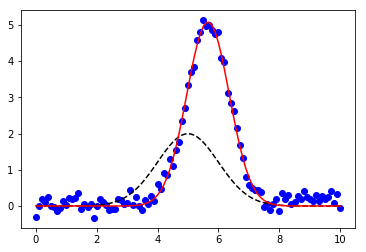

In [2]:
import matplotlib.pyplot as plt
from numpy import exp, loadtxt, pi, sqrt

from lmfit import Model

data = loadtxt('model1d_gauss.dat')
x = data[:, 0]
y = data[:, 1]


def gaussian(x, amp, cen, wid):
    """1-d gaussian: gaussian(x, amp, cen, wid)"""
    return (amp / (sqrt(2*pi) * wid)) * exp(-(x-cen)**2 / (2*wid**2))


gmodel = Model(gaussian)
result = gmodel.fit(y, x=x, amp=5, cen=5, wid=1)

print(result.fit_report())

plt.plot(x, y, 'bo')
plt.plot(x, result.init_fit, 'k--')
plt.plot(x, result.best_fit, 'r-')
plt.show()

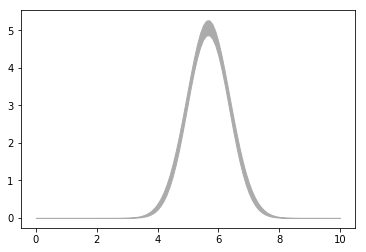

In [5]:
dely = result.eval_uncertainty(sigma=3)
plt.fill_between(x, result.best_fit-dely, result.best_fit+dely, color="#ABABAB")

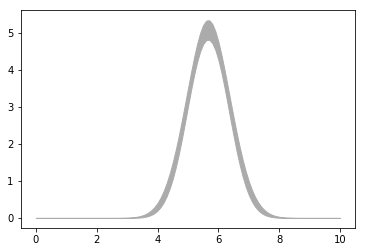

In [12]:
dely = result.eval_uncertainty(sigma=0.9999)
plt.fill_between(x, result.best_fit-dely, result.best_fit+dely, color="#ABABAB")